## What is Raster data?
**Raster or “gridded” data** are stored as a grid of values which are rendered on a map as pixels. Each pixel value represents an area on the Earth’s surface making the data spatial.

![Raster data](https://www.earthdatascience.org/images/earth-analytics/raster-data/raster-concept.png)

## What Types of Data Are Stored In Rasters?
some examples of data that often are provided in a raster format include:

* Satellite imagery
* Land use over large areas
* Elevation data
* Weather data
* Bathymetry data

In [2]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio

# Earthpy is an earthlab package to work with spatial data
import earthpy as et
import earthpy.plot as ep

In [8]:
# Get data and set working directory
et.data.get_data('colorado-flood')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

In [9]:
# Create a conncetion to the file
lidar_dem_path = os.path.join('colorado-flood', 
                              'spatial', 
                              'boulder-leehill-rd', 
                              'pre-flood', 
                              'lidar', 
                              'pre_DTM.tif')
lidar_dem_path

'colorado-flood\\spatial\\boulder-leehill-rd\\pre-flood\\lidar\\pre_DTM.tif'

In [10]:
# Open and read in the digital terrain model
# Note that rio is the alias of rasterio

with rio.open(lidar_dem_path) as src:
    # Read the data in and call it lidar_dtm (this is the variable name)
    lidar_dtm = src.read(1, masked = True)
lidar_dtm

masked_array(
  data=[[--, --, --, ..., 1695.6300048828125, 1695.419921875,
         1695.429931640625],
        [--, --, --, ..., 1695.5999755859375, 1695.5399169921875,
         1695.3599853515625],
        [--, --, --, ..., 1695.3800048828125, 1695.43994140625,
         1695.3699951171875],
        ...,
        [--, --, --, ..., 1681.449951171875, 1681.3900146484375, 1681.25],
        [--, --, --, ..., 1681.719970703125, 1681.5699462890625,
         1681.5599365234375],
        [--, --, --, ..., 1681.8900146484375, 1681.8099365234375,
         1681.739990234375]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=-3.4028235e+38,
  dtype=float32)

1. **rio.open()** - rio is the alias for rasterio. At the top of your code you include rasterio: import rasterio as rio.
2. **open()** creates a connection to the file on your computer
3. on the second line, **src.read()** reads the data into python so that you can use the data in your code.
4. **masked=True** in your **.read()** statement will mask all nodata values in your array. This means that they will not be plotted and also that they will not be included in math calculations in Python.

## Explore Raster Data values and Structure

In [11]:
type(lidar_dtm)

numpy.ma.core.MaskedArray

In [12]:
print(lidar_dtm.min(), lidar_dtm.max())

1676.21 2087.43


In [13]:
lidar_dtm.shape

(2000, 4000)

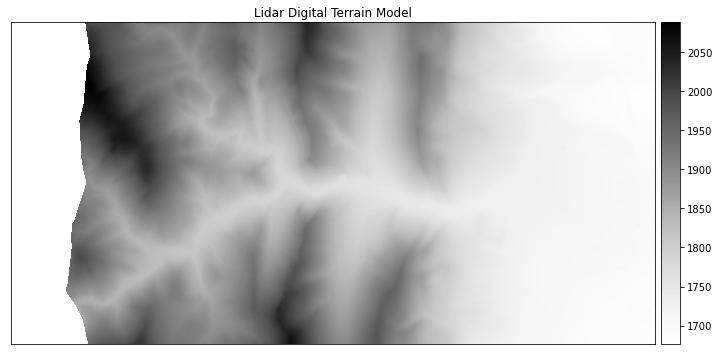

In [14]:
ep.plot_bands(lidar_dtm, 
             scale = False, 
             cmap = 'Greys', 
             title = 'Lidar Digital Terrain Model')
plt.show()

## Challenge: Open and Plot a Raster Dataset

In [15]:
lidar_dem_path_post_flood = os.path.join('colorado-flood', 'spatial', 
                                         'boulder-leehill-rd', 'post-flood', 'lidar', 
                                         'post_DTM.tif')
with rio.open(lidar_dem_path_post_flood) as src:
    # Read the data in and call it lidar_dtm (this is the variable name)
    lidar_dtm_post = src.read(1, masked = True)

In [16]:
type(lidar_dtm_post)

numpy.ma.core.MaskedArray

In [17]:
print(lidar_dtm_post.min(), lidar_dtm_post.max())

1675.71 2111.96


In [18]:
lidar_dtm_post.shape

(2000, 4000)

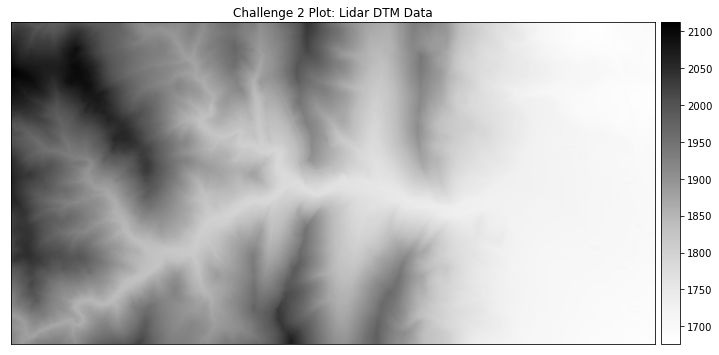

In [25]:
ep.plot_bands(lidar_dtm_post, 
              scale = False, 
              cmap = 'Greys', 
              title = 'Challenge 2 Plot: Lidar DTM Data')
plt.show()

In [20]:
# Download NAIP data
et.data.get_data(url = 'https://ndownloader.figshare.com/files/23070791')

'C:\\Users\\user\\earth-analytics\\data\\earthpy-downloads\\naip-before-after'

In [21]:
# Create a path for the data file - notice it is a .tif file
naip_pre_fire_path = os.path.join ('earthpy-downloads', 
                                   'naip-before-after', 
                                   'pre-fire', 
                                   'crop', 
                                   'm_3910505_nw_13_1_20150919_crop.tif')
naip_pre_fire_path

'earthpy-downloads\\naip-before-after\\pre-fire\\crop\\m_3910505_nw_13_1_20150919_crop.tif'

In [22]:
with rio.open(naip_pre_fire_path) as naip_prefire_src:
    naip_pre_fire = naip_prefire_src.read()
naip_pre_fire


array([[[113, 117, 137, ...,  54,  51,  74],
        [113, 117, 131, ...,  63,  54,  54],
        [111, 117, 120, ...,  78,  76,  52],
        ...,
        [191, 192, 193, ...,  58,  69,  76],
        [192, 192, 193, ...,  53,  62,  71],
        [193, 193, 193, ...,  51,  59,  66]],

       [[114, 114, 126, ...,  58,  54,  72],
        [114, 112, 120, ...,  70,  60,  58],
        [111, 114, 115, ...,  85,  87,  58],
        ...,
        [183, 184, 185, ...,  61,  75,  84],
        [184, 185, 185, ...,  56,  66,  78],
        [186, 186, 186, ...,  52,  58,  65]],

       [[ 80,  87,  95, ...,  55,  54,  63],
        [ 79,  83,  90, ...,  57,  55,  55],
        [ 81,  84,  87, ...,  62,  65,  55],
        ...,
        [161, 161, 163, ...,  54,  58,  64],
        [162, 164, 165, ...,  53,  58,  62],
        [165, 166, 166, ...,  51,  54,  57]],

       [[145, 143, 139, ...,  74,  47,  65],
        [145, 146, 139, ...,  98,  59,  57],
        [142, 144, 144, ..., 119, 107,  54],
        ..

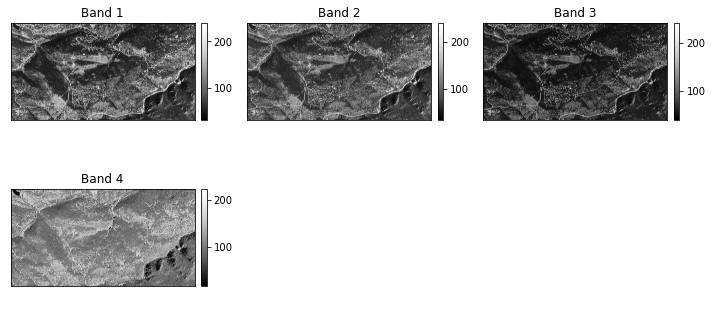

In [23]:
# Plot each layer or band of the image separately
ep.plot_bands(naip_pre_fire, figsize = (10, 5))
plt.show()

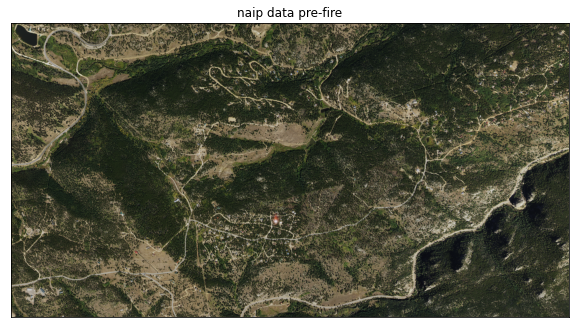

In [24]:
# Plot color image
ep.plot_rgb(naip_pre_fire, 
           title = 'naip data pre-fire')
plt.show()

## Challenge: Plot NAIP Image Post Fire

In [26]:
naip_post_fire_path = os.path.join ('earthpy-downloads', 
                                   'naip-before-after', 
                                   'post-fire', 
                                   'crop', 
                                   'm_3910505_nw_13_1_20170902_crop.tif')
naip_post_fire_path

'earthpy-downloads\\naip-before-after\\post-fire\\crop\\m_3910505_nw_13_1_20170902_crop.tif'

In [27]:
with rio.open(naip_post_fire_path) as naip_postfire_src:
    naip_post_fire = naip_postfire_src.read()
naip_post_fire

array([[[ 79,  92, 104, ...,  24,  21,  37],
        [ 95,  95,  94, ...,  28,  26,  45],
        [ 88,  98,  94, ...,  35,  43,  42],
        ...,
        [201, 200, 202, ...,  32,  15,  18],
        [201, 200, 201, ...,  13,  14,  11],
        [201, 200, 201, ...,  14,  18,  18]],

       [[104, 112, 117, ...,  48,  41,  57],
        [108, 114, 113, ...,  48,  43,  67],
        [103, 117, 111, ...,  67,  66,  75],
        ...,
        [188, 187, 188, ...,  50,  28,  37],
        [187, 186, 188, ...,  29,  29,  23],
        [187, 186, 188, ...,  26,  29,  28]],

       [[ 75,  81,  87, ...,  47,  49,  58],
        [ 80,  83,  85, ...,  48,  46,  54],
        [ 76,  85,  82, ...,  55,  53,  55],
        ...,
        [150, 148, 148, ...,  41,  35,  41],
        [149, 147, 149, ...,  36,  35,  35],
        [148, 147, 149, ...,  37,  38,  39]],

       [[181, 177, 177, ...,  68,  31,  51],
        [177, 183, 176, ..., 105,  82, 141],
        [176, 180, 178, ..., 149, 144, 156],
        ..

In [28]:
naip_post_fire.shape

(4, 2312, 4377)

In [29]:
type(naip_post_fire)

numpy.ndarray

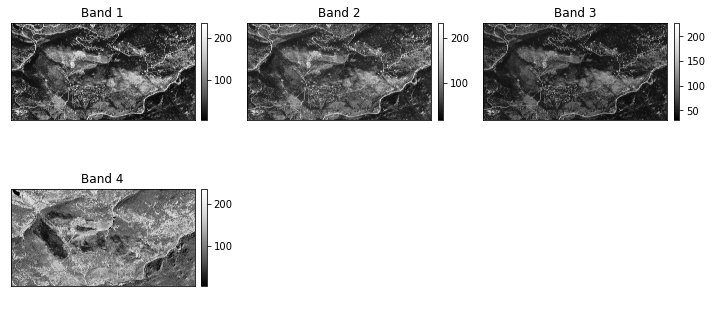

In [30]:
# Plot each layer or band of the image individually
ep.plot_bands(naip_post_fire, figsize = (10, 5))
plt.show()

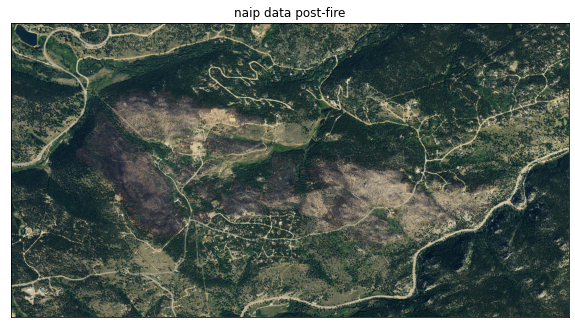

In [31]:
# Plot color image
ep.plot_rgb(naip_post_fire, 
           title = 'naip data post-fire')
plt.show()

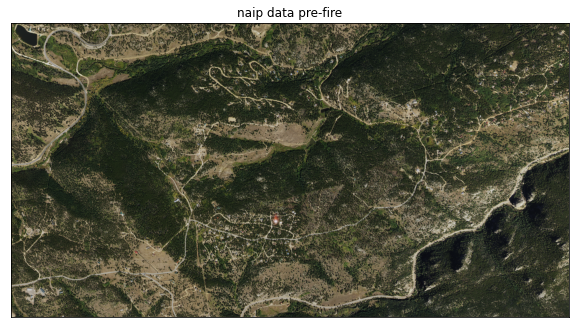

In [32]:
# Plot color image (easier to compare)
ep.plot_rgb(naip_pre_fire, 
           title = 'naip data pre-fire')
plt.show()